<a href="https://colab.research.google.com/github/VZwork17/PyLCM_edu/blob/main/CM_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate Modelling -- Introduction
For questions, contact Max (m.pierzyna@tudelft.nl)

## Set up Colab to work with climate data
Google Colab does not come with all Python packages required for Climate data analysis. We set them up here.
- **Copy** these cells whenever you start **a new** notebook
- **Run** these cells whenever you reopen **this** notebok

In [ ]:
!pip install cartopy==0.22.0 zarr gcsfs xarray[complete] cfgrib
!pip install --upgrade intake-esm
!pip install plotly
!pip install nc-time-axis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.8/72.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 8

In [ ]:
# Download tools for this course
!wget -O cm_tools.py https://gist.githubusercontent.com/maxiimilian/c0c36acb408e54508ceecd6876c5e2f0/raw/cm_tools.py

--2025-03-07 10:00:46--  https://gist.githubusercontent.com/maxiimilian/c0c36acb408e54508ceecd6876c5e2f0/raw/cm_tools.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5976 (5.8K) [text/plain]
Saving to: ‘cm_tools.py’

cm_tools.py         100%[===================>]   5.84K  --.-KB/s    in 0s      

2025-03-07 10:00:46 (49.4 MB/s) - ‘cm_tools.py’ saved [5976/5976]



After the above installation finishes **restart the runtime** (`Runtime`->`Restart session`)! All packages below should import without errors. No need to run the "install" cell again.

In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
import intake
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import cartopy.crs as ccrs
import plotly.express as px
import cm_tools
from dask.diagnostics import ProgressBar

## Load CMIP6 climate data (preconfigured)
Please check the [`cm_tools.py`](https://gist.github.com/maxiimilian/c0c36acb408e54508ceecd6876c5e2f0) file for details about models, scenarios, and variables that can be retreived. These model outputs are pre-selected for the assignments.

In [ ]:
# Load atmosphere and sea-ice data (both monthly)
amon = cm_tools.get_data_dict("CESM2-WACCM", "Amon")
simon = cm_tools.get_data_dict("CESM2-WACCM", "SImon")


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


ScenarioMIP.NCAR.CESM2-WACCM.ssp126.Amon.gn
CMIP.NCAR.CESM2-WACCM.historical.Amon.gn
ScenarioMIP.NCAR.CESM2-WACCM.ssp370.Amon.gn
ScenarioMIP.NCAR.CESM2-WACCM.ssp245.Amon.gn
ScenarioMIP.NCAR.CESM2-WACCM.ssp585.Amon.gn

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


CMIP.NCAR.CESM2-WACCM.historical.SImon.gn
ScenarioMIP.NCAR.CESM2-WACCM.ssp585.SImon.gn
ScenarioMIP.NCAR.CESM2-WACCM.ssp245.SImon.gn
ScenarioMIP.NCAR.CESM2-WACCM.ssp126.SImon.gn
ScenarioMIP.NCAR.CESM2-WACCM.ssp370.SImon.gn


In [ ]:
# The keys of both dicts are just the names of the scenarios
print(amon.keys())
print(simon.keys())

dict_keys(['ssp126', 'historical', 'ssp370', 'ssp245', 'ssp585'])
dict_keys(['historical', 'ssp585', 'ssp245', 'ssp126', 'ssp370'])


In [ ]:
tas_ssp126 = amon['ssp126']["tas"].isel(member_id=0).squeeze()
tas_ssp370 = amon['ssp370']["tas"].isel(member_id=0).squeeze()
tas_hist = amon['historical']["tas"].isel(member_id=0).squeeze()

In [ ]:
# check length
tas_ssp126

<xarray.DataArray 'tas' (time: 1632, lat: 192, lon: 288)> Size: 361MB
dask.array<getitem, shape=(1632, 192, 288), dtype=float32, chunksize=(408, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat             (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon             (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * time            (time) datetime64[ns] 13kB 2015-01-15T12:00:00 ... 2150-1...
    member_id       <U8 32B 'r1i1p1f1'
    dcpp_init_year  float64 8B nan
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [ ]:
tas_ssp370

<xarray.DataArray 'tas' (time: 1032, lat: 192, lon: 288)> Size: 228MB
dask.array<getitem, shape=(1032, 192, 288), dtype=float32, chunksize=(492, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat             (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon             (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * time            (time) datetime64[ns] 8kB 2015-01-15T12:00:00 ... 2100-12...
    dcpp_init_year  float64 8B nan
    member_id       <U8 32B 'r1i1p1f1'
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        TREFHT
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

In [ ]:
tas_hist

<xarray.DataArray 'tas' (time: 1980, lat: 192, lon: 288)> Size: 438MB
dask.array<getitem, shape=(1980, 192, 288), dtype=float32, chunksize=(600, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat             (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon             (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * time            (time) datetime64[ns] 16kB 1850-01-15T12:00:00 ... 2014-1...
    member_id       <U8 32B 'r1i1p1f1'
    dcpp_init_year  float64 8B nan
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        near-surface (usually, 2 meter) air temperature
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

## Some utility functions and preparation for area computations

In [ ]:
# Set this to n_lat and n_lon of your model
n_lat = 192
n_lon = 288
cell_area = cm_tools.get_cell_area(
    lat_deg = np.linspace(-90, 90, n_lat+1),
    lon_deg = np.linspace(0, 360, n_lon+1)
)
cell_area.shape

(192, 288)

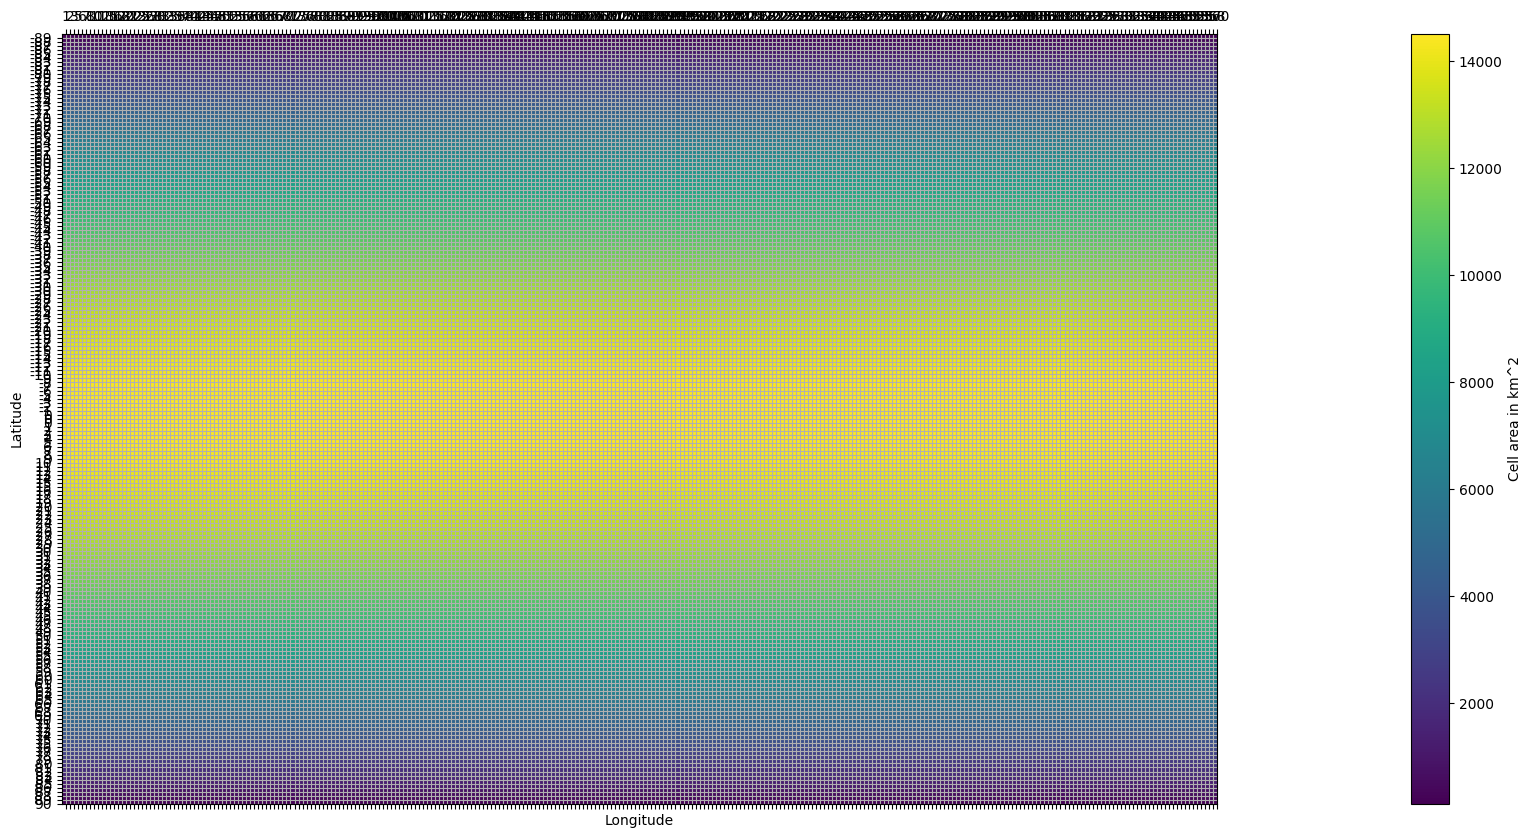

In [ ]:
# Plot to see what field means
fig, ax = plt.subplots(figsize=(50, 10))
m = ax.matshow(cell_area)
fig.colorbar(m, label="Cell area in km^2") # is it?
ax.grid()
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_xticks(np.arange(n_lon) + .5)
ax.set_xticklabels(np.linspace(0, 360, n_lon+1)[1:].astype(int))
ax.set_yticks(np.arange(n_lat) + .5)
ax.set_yticklabels(np.linspace(-90, 90, n_lat+1)[1:].astype(int))
plt.show()

In [ ]:
# Make function for yearly global mean for easy access
def compute_global_avg(v):
    # lat weighting
    w = np.cos(np.deg2rad(v.lat))
    v = v.weighted(w)
    # spatial avg
    v = v.mean(["lat", "lon"])
    return v

# Compute averages for all scenarios
def tas_averaging(tas):
    #tas = tas - 273.15 # convert to degree Celsius

    w = np.cos(np.deg2rad(tas.lat)) # weights
    tas_w = tas.weighted(w) # weighted array
    tas_global = tas_w.mean(["lat", "lon"]) # global average

    tas_global_1y = tas_global.resample(time="1YE").mean() # compute yearly mean
    tas_global_20y_rm = tas_global_1y.rolling(time=20, center=True).mean() # compute 20y mean

    return tas_global, tas_global_1y, tas_global_20y_rm


## Lazy crappy code in this section.
Please ignore me

In [ ]:
# actually don't need this!
tas_ssp126_global, tas_ssp126_global_1y, _ = tas_averaging(tas_ssp126.sel(time=slice(None, "2100")))
tas_ssp370_global, tas_ssp370_global_1y, _ = tas_averaging(tas_ssp370)
tas_hist_global, tas_hist_global_1y, _ = tas_averaging(tas_hist.sel(time=slice("1961", None)))


In [ ]:
# augmented arrays (last year of historical series) actually don't need this!
last_hist = tas_hist_global_1y.sel(time="2014")


tas_ssp126_global_1y_aug = xr.concat([last_hist, tas_ssp126_global_1y], dim="time")
tas_ssp370_global_1y_aug = xr.concat([last_hist, tas_ssp370_global_1y], dim="time")

In [ ]:
# 20y rolling mean
tas_hist_ssp126_global_1y = xr.concat([tas_hist_global_1y, tas_ssp126_global_1y], dim="time")
tas_hist_ssp370_global_1y = xr.concat([tas_hist_global_1y, tas_ssp370_global_1y], dim="time")

tas_ssp126_global_20y = tas_hist_ssp126_global_1y.rolling(time=20, center=True).mean()
tas_ssp370_global_20y = tas_hist_ssp370_global_1y.rolling(time=20, center=True).mean()
tas_hist_global_20y = tas_hist_global_1y.rolling(time=20, center=True).mean()


## Here cleaner version

### Global temperature

In [ ]:
# select relevant time intervals
tas_ssp126 = tas_ssp126.sel(time=slice(None, "2100"))
tas_hist = tas_hist.sel(time=slice("1961", None))

# combine datasets
tas_hist_ssp126 = xr.concat([tas_hist, tas_ssp126], dim="time")
tas_hist_ssp370 = xr.concat([tas_hist, tas_ssp370], dim="time")

# spatial and temporal averaging
tas_ssp126_global, tas_ssp126_global_1y, tas_ssp126_global_20y = tas_averaging(tas_hist_ssp126)
tas_ssp370_global, tas_ssp370_global_1y, tas_ssp370_global_20y = tas_averaging(tas_hist_ssp370)
tas_hist_global, tas_hist_global_1y, tas_hist_global_20y = tas_averaging(tas_hist)


In [ ]:
# values for the table
reference_hist = tas_hist_global_1y.sel(time=slice("1961","1980")).mean()
reference_hist_std = tas_hist_global_1y.sel(time=slice("1961","1980")).std()

tas_ssp126_dev_mid = tas_ssp126_global_1y.sel(time=slice("2041","2060")).mean()-reference_hist
tas_ssp370_dev_mid = tas_ssp370_global_1y.sel(time=slice("2041","2060")).mean()-reference_hist

tas_ssp126_dev_long = tas_ssp126_global_1y.sel(time=slice("2061","2080")).mean()-reference_hist
tas_ssp370_dev_long = tas_ssp370_global_1y.sel(time=slice("2061","2080")).mean()-reference_hist

print(f"historical reference = {reference_hist.values :.3f} ({reference_hist_std.values :.3f})")

#How much cooler is global climate by 2061-2080 in the scenario 1 with respect to scenario 2?
print(f"change for SSP 1-2.6: mid-term = {tas_ssp126_dev_mid.values :.3f} \t long-term {tas_ssp126_dev_long.values :.3f}")
print(f"change for SSP-3-7.0: mid-term = {tas_ssp370_dev_mid.values :.3f} \t long-term {tas_ssp370_dev_long.values :.3f}")


historical reference = 287.183 (0.117)
change for SSP 1-2.6: mid-term = 1.978 	 long-term 2.134
change for SSP-3-7.0: mid-term = 2.164 	 long-term 3.103


In [ ]:
# temperature anomaly
dtas_ssp126_global_1y = (tas_ssp126_global_1y-reference_hist).compute()
dtas_ssp370_global_1y = (tas_ssp370_global_1y-reference_hist).compute()
dtas_hist_global_1y = (tas_hist_global_1y-reference_hist).compute()
dtas_ssp126_global_20y = (tas_ssp126_global_20y-reference_hist).compute()
dtas_ssp370_global_20y = (tas_ssp370_global_20y-reference_hist).compute()
dtas_hist_global_20y = (tas_hist_global_20y-reference_hist).compute()


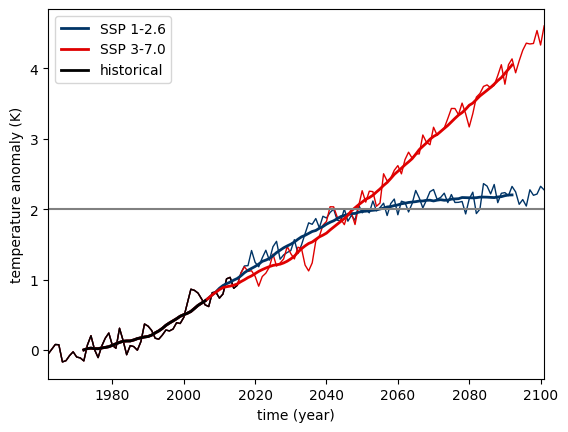

In [39]:
# Plot
fig, ax = plt.subplots()

c126 = "#003466"
c370 = "#df0000"

c1 = "#1e9583"
c2 = "#4576be"
c5 = "#8036a7"
c3 = "#f11111"


dtas_ssp126_global_1y.plot(ax=ax,color=c126,linewidth=1)
dtas_ssp370_global_1y.plot(ax=ax,color=c370,linewidth=1)
dtas_hist_global_1y.plot(ax=ax,color='k',linewidth=1)
dtas_ssp126_global_20y.plot(ax=ax,color=c126,linewidth=2,label="SSP 1-2.6")
dtas_ssp370_global_20y.plot(ax=ax,color=c370,linewidth=2,label="SSP 3-7.0")
dtas_hist_global_20y.plot(ax=ax,color='k',linewidth=2,label='historical')

plt.axhline(y=2,linestyle='-',color="gray",) # just a visual check, remove for report

ax.set_xlabel('time (year)')
ax.set_ylabel('temperature anomaly (K)')
ax.set_title("")
plt.legend()
ax.margins(x=0)

plt.show()

In [ ]:
# what is the timing for the centered running mean to reach +2 K?
print(dtas_ssp126_global_20y.where(dtas_ssp126_global_20y>2,drop=True).time.values[0])
print(dtas_ssp370_global_20y.where(dtas_ssp370_global_20y>2,drop=True).time.values[0])


2054-12-31T00:00:00.000000000
2047-12-31T00:00:00.000000000


### Sea ice  

In [ ]:
si_ssp126 = simon['ssp126']["siconca"].isel(member_id=0).squeeze().sel(lat=slice(60, None)).sel(time=slice("2061", "2080"))/100
si_ssp370 = simon['ssp370']["siconca"].isel(member_id=0).squeeze().sel(lat=slice(60, None)).sel(time=slice("2061", "2080"))/100
si_hist = simon['historical']["siconca"].isel(member_id=0).squeeze().sel(lat=slice(60, None)).sel(time=slice("1961", "1980"))/100

In [ ]:
si_hist

<xarray.DataArray 'siconca' (time: 240, lat: 32, lon: 288)> Size: 9MB
dask.array<truediv, shape=(240, 32, 288), dtype=float32, chunksize=(240, 32, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat             (lat) float64 256B 60.79 61.73 62.67 ... 88.12 89.06 90.0
  * lon             (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * time            (time) datetime64[ns] 2kB 1961-01-15T12:00:00 ... 1980-12...
    member_id       <U8 32B 'r1i1p1f1'
    dcpp_init_year  float64 8B nan

In [ ]:
(cell_area[0:32,:]).shape

(32, 288)

In [ ]:
def pipe_sea_ice(data):
    total = data.weighted(xr.DataArray(cell_area[0:32,:], dims=['lat', 'lon'])).sum(["lat", "lon"])

    by_month = total.groupby("time.month").mean()
    std = total.groupby("time.month").std()
    return by_month/1e6, std/1e6

In [ ]:
si_ssp126_total, si_ssp126_std = pipe_sea_ice(si_ssp126)
si_ssp370_total, si_ssp370_std = pipe_sea_ice(si_ssp370)
si_hist_total, si_hist_std = pipe_sea_ice(si_hist)

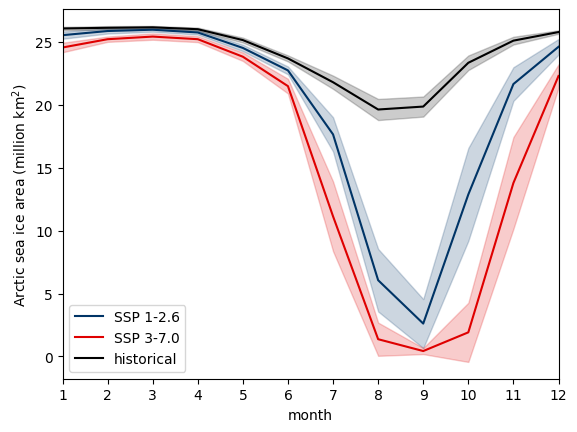

In [ ]:
# Plot ensemble mean and standard deviation
fig, ax = plt.subplots()

# Auto-plotting of xarray can be used for simple time series...\
si_ssp126_total.plot(ax=ax,label="SSP 1-2.6",color=c126)
si_ssp370_total.plot(ax=ax, label="SSP 3-7.0",color=c370)
si_hist_total.plot(ax=ax, label="historical",color="k")

# ...but not for more complex elements
ax.fill_between(si_ssp126_total.month, si_ssp126_total - si_ssp126_std, si_ssp126_total + si_ssp126_std, alpha=0.2,color=c126)
ax.fill_between(si_ssp370_total.month, si_ssp370_total - si_ssp370_std, si_ssp370_total + si_ssp370_std, alpha=0.2,color=c370)
ax.fill_between(si_hist_total.month, si_hist_total - si_hist_std, si_hist_total + si_hist_std, alpha=0.2,color="k")

plt.legend()
ax.set_xlabel("month")
ax.set_ylabel(r"Arctic sea ice area (million km$^2$)")
ax.set_title("")
ax.set_xticks(si_hist_total.month)
#ax.set_xticklabels(np.linspace(0, 360, n_lon+1)[1:].astype(int))

ax.margins(x=0)
plt.show()

In [ ]:
print(f"SSP 1-2.6: min in "+str(si_ssp126_total.idxmin(dim="month").values)+" max in "+str(si_ssp126_total.idxmax(dim="month").values))
print(f"SSP 3-7.0: min in "+str(si_ssp370_total.idxmin(dim="month").values)+" max in "+str(si_ssp370_total.idxmax(dim="month").values))
print(f"historical: min in "+str(si_hist_total.idxmin(dim="month").values)+" max in "+str(si_hist_total.idxmax(dim="month").values))


SSP 1-2.6: min in 9.0 max in 3.0
SSP 3-7.0: min in 9.0 max in 3.0
historical: min in 8.0 max in 3.0


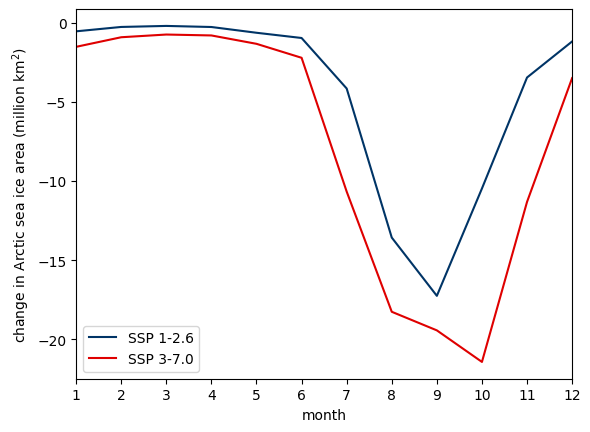

In [ ]:
fig, ax = plt.subplots()

(si_ssp126_total-si_hist_total).plot(color=c126,label='SSP 1-2.6')
(si_ssp370_total-si_hist_total).plot(color=c370,label='SSP 3-7.0')

plt.legend()
ax.set_xlabel("month")
ax.set_ylabel(r"change in Arctic sea ice area (million km$^2$)")
ax.set_title("")
ax.set_xticks(si_hist_total.month)
#ax.set_xticklabels(np.linspace(0, 360, n_lon+1)[1:].astype(int))

ax.margins(x=0)
plt.show()

In [ ]:
with ProgressBar():
    tas_ssp370_winter = amon["ssp370"]["tas"].isel(member_id=0).sel(time=slice("2061","2080")).squeeze().groupby("time.season")["DJF"].mean("time").compute()
    tas_ssp370_summer = amon["ssp370"]["tas"].isel(member_id=0).sel(time=slice("2061","2080")).squeeze().groupby("time.season")["JJA"].mean("time").compute()

    tas_hist_winter = amon["historical"]["tas"].isel(member_id=0).sel(time=slice("1961","1980")).squeeze().groupby("time.season")["DJF"].mean("time").compute()
    tas_hist_summer = amon["historical"]["tas"].isel(member_id=0).sel(time=slice("1961","1980")).squeeze().groupby("time.season")["JJA"].mean("time").compute()


[########################################] | 100% Completed | 1.54 s
[########################################] | 100% Completed | 1.34 s
[########################################] | 100% Completed | 921.17 ms
[########################################] | 100% Completed | 714.59 ms


In [ ]:
dtas_winter = (tas_ssp370_winter-tas_hist_winter).compute()
dtas_summer = (tas_ssp370_summer-tas_hist_summer).compute()

In [ ]:
with ProgressBar():
    si_ssp370_9 = simon["ssp370"]["siconca"].isel(member_id=0).sel(time=slice("2061","2080")).squeeze().groupby("time.month")[9].mean("time").compute()
    si_ssp370_3 = simon["ssp370"]["siconca"].isel(member_id=0).sel(time=slice("2061","2080")).squeeze().groupby("time.month")[3].mean("time").compute()

    si_hist_9 = simon["historical"]["siconca"].isel(member_id=0).sel(time=slice("1961","1980")).squeeze().groupby("time.month")[9].mean("time").compute()
    si_hist_3 = simon["historical"]["siconca"].isel(member_id=0).sel(time=slice("1961","1980")).squeeze().groupby("time.month")[3].mean("time").compute()


[########################################] | 100% Completed | 507.83 ms
[########################################] | 100% Completed | 406.50 ms
[########################################] | 100% Completed | 410.93 ms
[########################################] | 100% Completed | 515.79 ms


In [ ]:
#get values for colormap
max = np.max([dtas_winter.max().values,dtas_summer.max().values])
min = np.min([dtas_winter.min().values,dtas_summer.min().values])
vmax = np.max([np.abs(max),np.abs(min)])
vmax

16.345917

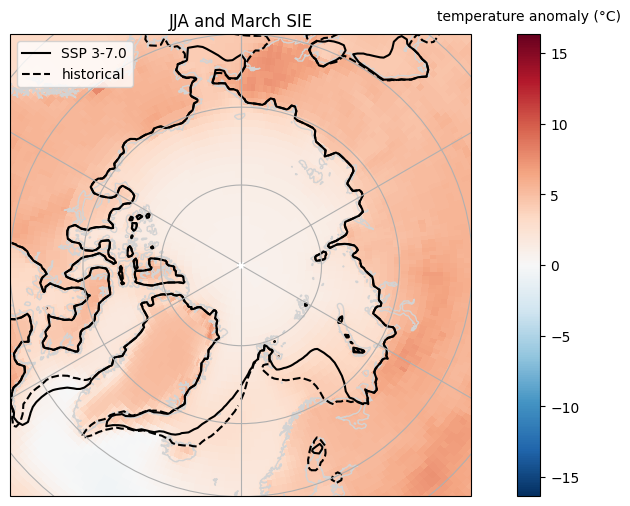

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.Orthographic(0, 90)}, figsize=(12, 6))
f = dtas_summer.plot(ax=ax, transform=ccrs.PlateCarree(),add_colorbar=False,vmax=vmax)
ax.coastlines(color="lightgrey")
ax.gridlines()
ax.set_title("JJA")
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())

a = si_hist_3.plot.contour(ax=ax, transform=ccrs.PlateCarree(),add_colorbar=False, levels=[15], colors=['k'], linestyles=['--'], label='historical')
b = si_ssp370_3.plot.contour(ax=ax, transform=ccrs.PlateCarree(),add_colorbar=False, levels=[15], colors=['k'], linestyles=['-'], label='SSP 3-7.0')

cbar = fig.colorbar(f,ax=ax,location='right')
cbar.ax.set_title(r'temperature anomaly (°C)', fontsize = 10, pad = 10)

ax.set_title("JJA and March SIE")

# Create a proxy artist for the legend
proxy_a = mlines.Line2D([], [], color='k', linestyle='--', label='historical')
proxy_b = mlines.Line2D([], [], color='k', linestyle='-', label='SSP 3-7.0')


# Create the legend with only the contour line
ax.legend(handles=[proxy_b,proxy_a],loc="upper left")

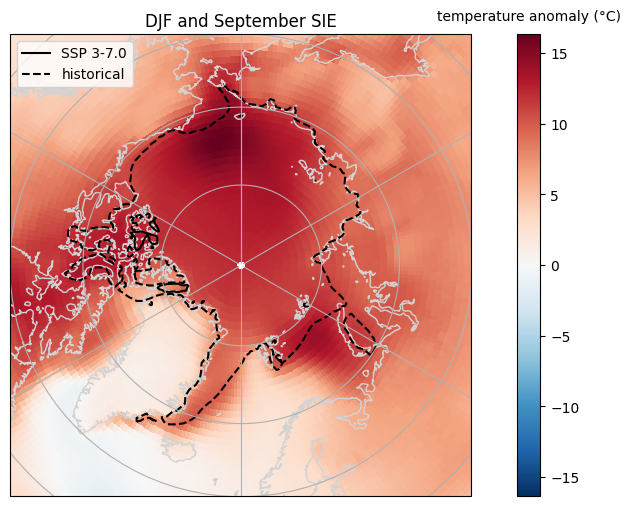

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.Orthographic(0, 90)}, figsize=(12, 6))
f = dtas_winter.plot(ax=ax, transform=ccrs.PlateCarree(),add_colorbar=False,vmax=vmax)
ax.coastlines(color="lightgrey") # something is wrong!!
ax.gridlines()
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())

cbar = fig.colorbar(f,ax=ax,location='right')
cbar.ax.set_title(r'temperature anomaly (°C)', fontsize = 10, pad = 10)

si_hist_9.plot.contour(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False, levels=[15], linestyles=['--'], colors=['k'], label='historical')
si_ssp370_9.plot.contour(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False, levels=[15], linestyles=['-'],  colors=['k'],label='SSP 3-7.0')

ax.set_title("DJF and September SIE")

# Create a proxy artist for the legend
proxy_a = mlines.Line2D([], [], color='k', linestyle='--', label='historical')
proxy_b = mlines.Line2D([], [], color='k', linestyle='-', label='SSP 3-7.0')


# Create the legend with only the contour line
ax.legend(handles=[proxy_b,proxy_a],loc="upper left")
